# K-Means Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv("Data/Mall_Customers.csv")
display(dataset.head(), len(dataset))

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


200

In [9]:
## well cluster the last 2 to see if we can group the people (can aslo show it)
X = dataset.iloc[:, [3,4]].values

## Lets plot the data and look at the data for intuative clustering

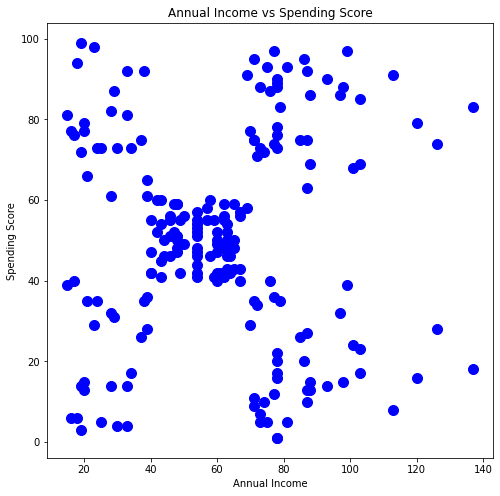

In [16]:
fig = plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'blue')

plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.show()

Looks like we have ~5 clusters

## Using the elbow method to find the optimal number of clusters

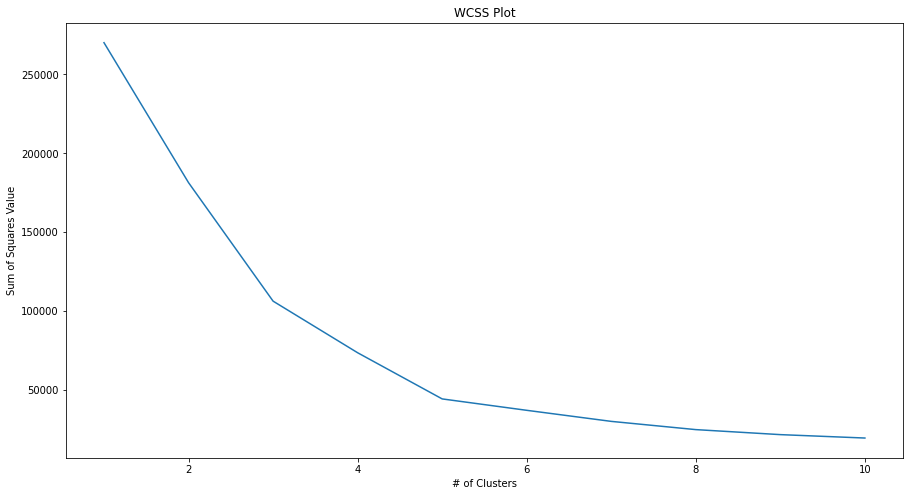

In [18]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++").fit(X)
    wcss.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15, 8))

plt.plot(range(1, 11), wcss)

plt.title("WCSS Plot")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Squares Value")

plt.show()

this chart re iterates our intuation that 5 is the best tradeof for the best clear cut clusters

## Training the K-Means model on the dataset

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = "k-means++").fit(X)
y_clusters = kmeans.predict(X)

## Visualising the clusters

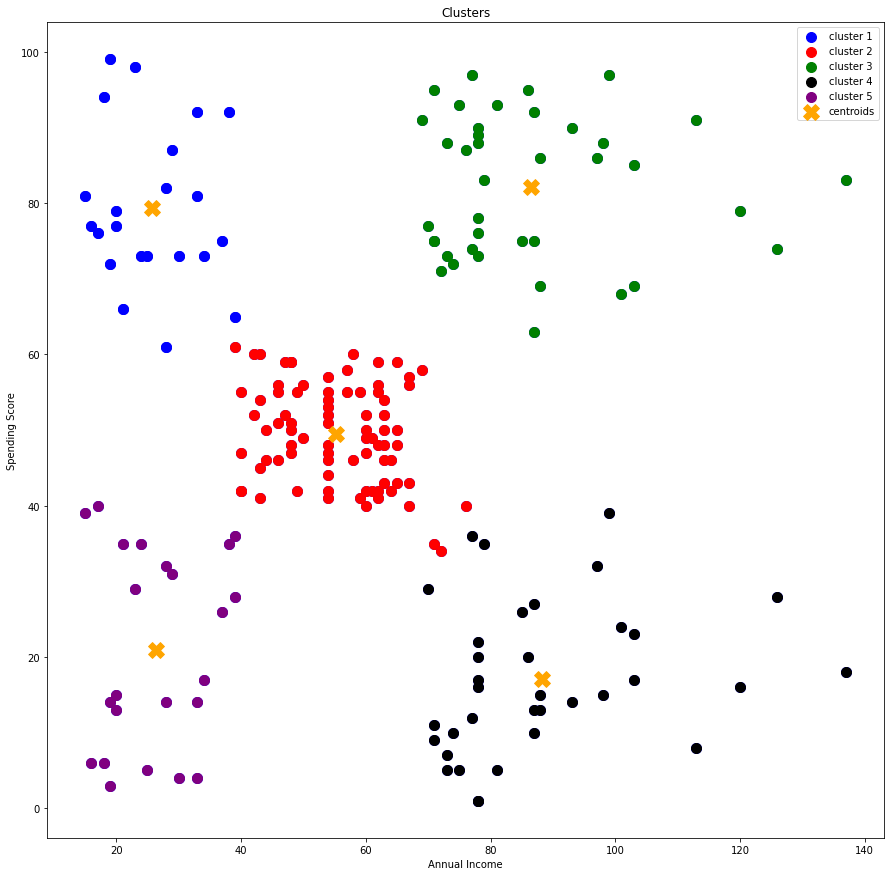

In [30]:
fig = plt.figure(figsize=(15, 15))

plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'blue')

plt.scatter(X[y_clusters==0, 0], X[y_clusters==0, 1], s = 100, c = 'blue', label = "cluster 1")
plt.scatter(X[y_clusters==1, 0], X[y_clusters==1, 1], s = 100, c = 'red', label = "cluster 2")
plt.scatter(X[y_clusters==2, 0], X[y_clusters==2, 1], s = 100, c = 'green', label = "cluster 3")
plt.scatter(X[y_clusters==3, 0], X[y_clusters==3, 1], s = 100, c = 'black', label = "cluster 4")
plt.scatter(X[y_clusters==4, 0], X[y_clusters==4, 1], s = 100, c = 'purple', label = "cluster 5")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'orange', label = "centroids", marker = "X")

plt.title("Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

plt.show()